# Importing Libraries

In [1]:
import pandas as pd
#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style



# Algorithms
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
automobile=pd.read_csv('Automobile_insurance_claim.csv')
automobile.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [3]:
automobile.shape

(9134, 26)

* From here we can observe that 9134 rows and 26 columns present in this dataset

# Data Exploration

In [4]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

1. Here we can observe that Total_claim amount and claim amount both attributes are in floating format  
2. Income,Monthly_premium_auto,months since last claim,months since policy inception,numer of open complaints and policies all these attributes are in interger format.
3. OTHER than these two datatypes and all other attributes are in object format.

From here Effective_to_date is in object format not in date format need to change it to date format.

In [5]:
automobile['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [6]:
automobile['Effective To Date']=pd.to_datetime(automobile['Effective To Date'])
automobile['Year']=automobile['Effective To Date'].apply(lambda x:x.year)
automobile['Month']=automobile['Effective To Date'].apply(lambda x:x.month)
automobile['Day']=automobile['Effective To Date'].apply(lambda x:x.day)

In [7]:
automobile.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Year,Month,Day
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.0,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,2011.0,1.463762,15.461134
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.0,0.498712,8.653770
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,2011.0,1.000000,1.000000
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,2011.0,1.000000,8.000000
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,2011.0,1.000000,15.000000
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2011.0,2.000000,23.000000
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2011.0,2.000000,31.000000


* From here we can observe that Minimum claim amount is 189 and maximum is 8332.
* And also we can see in Claim amount there is alot of difference between 75% and maximum in the sense it contains outliers.
* Minimum income here is 0 and maximum income is 99981.
* And we can observe another one in income is the difference between 75% and maximum is alot so it contains outliers .
* minimum number of policies is 1 and maximum number of policies is 9.

> From above we seeing complete numerical data for categorical i'm going to handle with grouping all together.

#### For Categorical Data

In [8]:
automobile.groupby(by =['Customer', 'Country', 'State Code', 'State',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender',  'Location Code',
       'Marital Status', 

       'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel',  'Vehicle Class', 'Vehicle Size']).size()

Customer  Country  State Code  State     Response  Coverage  Education             Effective To Date  EmploymentStatus  Gender  Location Code  Marital Status  Policy Type     Policy        Claim Reason  Sales Channel  Vehicle Class  Vehicle Size
AA10041   US       MO          Missouri  No        Basic     High School or Below  2011-02-02         Unemployed        M       Suburban       Single          Personal Auto   Personal L3   Collision     Call Center    SUV            Medsize         1
AA11235   US       OK          Oklahoma  No        Basic     Bachelor              2011-01-28         Medical Leave     F       Suburban       Married         Personal Auto   Personal L3   Hail          Branch         Two-Door Car   Medsize         1
AA16582   US       KS          Kansas    Yes       Basic     Bachelor              2011-01-26         Medical Leave     M       Suburban       Divorced        Personal Auto   Personal L2   Collision     Agent          Four-Door Car  Medsize         1
A

# Dealing With Missing Values

In [9]:
automobile.isna().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Year                             0
Month                            0
Day                 

* from here it is clear that there is no missing data present in this dataset.


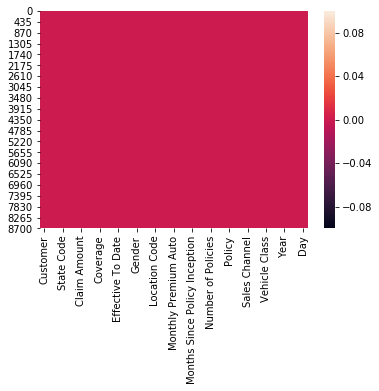

In [10]:
sns.heatmap(automobile.isnull())

From here you may see that there is no null data present in this dataset and both two format are collect to know weathr missing values are present or not.

# Inspecting Duplicates

In [11]:
automobile.nunique()

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
Year        

* From here you can see that one state shows up in 5 times 

In [12]:
automobile.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Year', 'Month', 'Day'],
      dtype='object')

In [13]:
#cleaning columns
automobile.columns=['Customer', 'Country', 'State_Code', 'State', 'Claim_Amount',
       'Response', 'Coverage', 'Education', 'Effective_To_Date',
       'Employment_Status', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Policy_Type', 'Policy', 'Claim_Reason',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size','Year','Month','Day']

In [14]:
automobile['Income'].value_counts()

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: Income, Length: 5694, dtype: int64

>Here you  can see columns had been cleaned.

And it's better to drop Effective_to_Date column.

In [15]:
automobile.drop('Effective_To_Date',inplace=True,axis=1)

let's check data once 

In [16]:
automobile.head()

,Customer,Country,State_Code,State,Claim_Amount,Response,Coverage,Education,Employment_Status,Gender,...,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Year,Month,Day
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,Employed,F,...,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,...,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,...,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,2011,2,19
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,...,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,2011,1,20
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,Employed,M,...,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,2011,2,3


Here you can see Effective_to_date column had been droped.

In [17]:
automobile['Claim_Amount']=automobile['Claim_Amount'].astype('int')
automobile['Total_Claim_Amount']=automobile['Total_Claim_Amount'].astype('int')

In [18]:
automobile['Claim_Amount'].max()

8332

In [19]:
automobile.head()

,Customer,Country,State_Code,State,Claim_Amount,Response,Coverage,Education,Employment_Status,Gender,...,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Year,Month,Day
0,BU79786,US,KS,Kansas,276,No,Basic,Bachelor,Employed,F,...,Corporate Auto,Corporate L3,Collision,Agent,384,Two-Door Car,Medsize,2011,2,24
1,QZ44356,US,NE,Nebraska,697,No,Extended,Bachelor,Unemployed,F,...,Personal Auto,Personal L3,Scratch/Dent,Agent,1131,Four-Door Car,Medsize,2011,1,31
2,AI49188,US,OK,Oklahoma,1288,No,Premium,Bachelor,Employed,F,...,Personal Auto,Personal L3,Collision,Agent,566,Two-Door Car,Medsize,2011,2,19
3,WW63253,US,MO,Missouri,764,No,Basic,Bachelor,Unemployed,M,...,Corporate Auto,Corporate L2,Collision,Call Center,529,SUV,Medsize,2011,1,20
4,HB64268,US,KS,Kansas,281,No,Basic,Bachelor,Employed,M,...,Personal Auto,Personal L1,Collision,Agent,138,Four-Door Car,Medsize,2011,2,3


In [20]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 28 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State_Code                       9134 non-null object
State                            9134 non-null object
Claim_Amount                     9134 non-null int32
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Employment_Status                9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9

# Exploratory Data Analysis

#### Mostly whose claim amount is high What their education qualification?

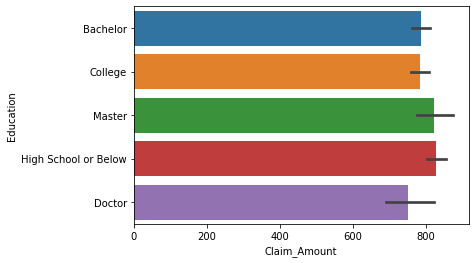

In [21]:
sns.barplot(x='Claim_Amount',y='Education',data=automobile)

* From here we can observe that Mostly whose education qualification is Master and High school or below their total number of persons who claim amount total number is more than 800.
* Whose education qualification is Bachelor and College their total number of persons in in between 700-800.
* who have doctor qualification total number of claim amount is in 700 -800. 

#### What are the different vehicle classes present?

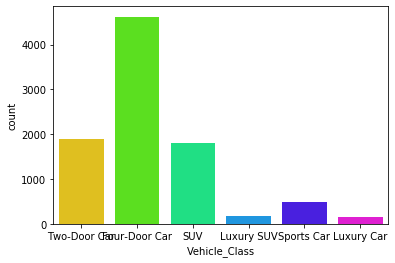

In [22]:
sns.countplot(automobile['Vehicle_Class'],palette='hsv')

1. Here you can see four door car vehicle's are more compare to all other cars.
2. Luxury cars are least number of vehicle's compare to all other cars.

#### In which country people's are mostly employed ?

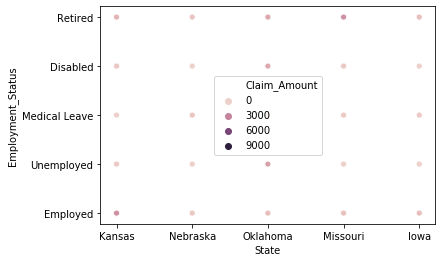

In [23]:
sns.scatterplot(x='State',y='Employment_Status',hue='Claim_Amount',data=automobile)

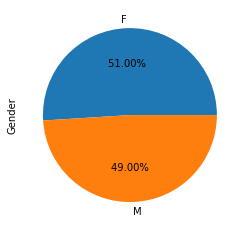

In [24]:
automobile['Gender'].value_counts().plot.pie(autopct='%1.2f%% ')

Here female percentage is 51% and male percentage is 49%

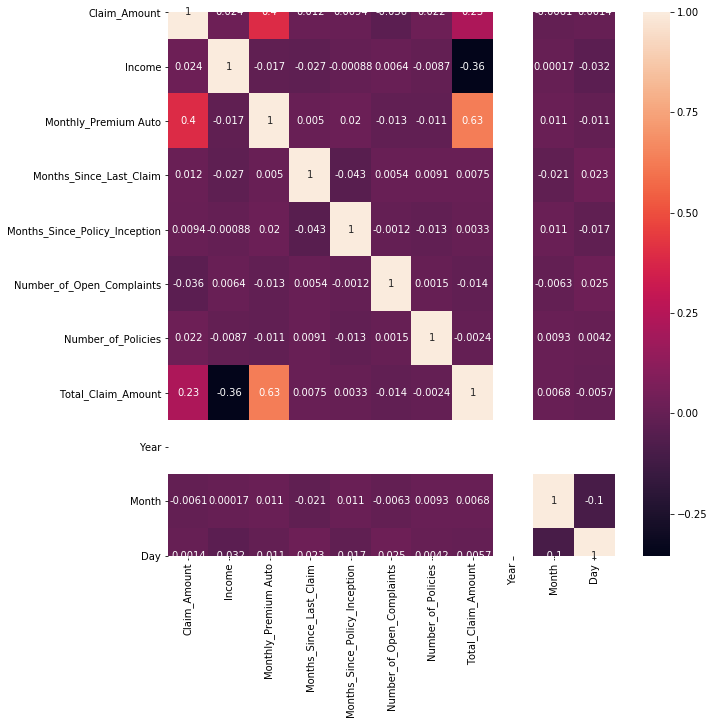

In [25]:
#check cor-relation
corr_hmap=automobile.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)


From here you can see that year is complete Negatively cor-relate with all other 

In [26]:
automobile.columns

Index(['Customer', 'Country', 'State_Code', 'State', 'Claim_Amount',
       'Response', 'Coverage', 'Education', 'Employment_Status', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Claim_Reason', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size', 'Year', 'Month', 'Day'],
      dtype='object')

In [27]:
le=LabelEncoder()
list1=['Customer', 'Country',  'State', 'State_Code',
       'Response', 'Coverage', 'Education', 'Employment_Status', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 
       'Policy_Type',
       'Policy', 'Claim_Reason', 'Sales_Channel', 
       'Vehicle_Class', 'Vehicle_Size']
for val in list1:
    automobile[val]=le.fit_transform(automobile[val].astype(str))

In [28]:
automobile.head()

,Customer,Country,State_Code,State,Claim_Amount,Response,Coverage,Education,Employment_Status,Gender,...,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Year,Month,Day
0,600,0,1,1,276,0,0,0,1,0,...,0,2,0,0,384,5,1,2011,2,24
1,5946,0,3,3,697,0,1,0,4,0,...,1,5,3,0,1131,0,1,2011,1,31
2,96,0,4,4,1288,0,2,0,1,0,...,1,5,0,0,566,5,1,2011,2,19
3,8016,0,2,2,764,0,0,0,4,1,...,0,1,0,2,529,3,1,2011,1,20
4,2488,0,1,1,281,0,0,0,1,1,...,1,3,0,0,138,0,1,2011,2,3


# Check Skewness

In [29]:
automobile.skew()

Customer                         0.000000
Country                          0.000000
State_Code                       0.021065
State                            0.021065
Claim_Amount                     3.032259
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Employment_Status                0.832147
Gender                           0.039866
Income                           0.371418
Location_Code                    0.009511
Marital_Status                  -0.107553
Monthly_Premium Auto             2.123546
Months_Since_Last_Claim          0.278586
Months_Since_Policy_Inception    0.040165
Number_of_Open_Complaints        2.783263
Number_of_Policies               1.253333
Policy_Type                     -0.468383
Policy                          -0.427639
Claim_Reason                     0.733526
Sales_Channel                    0.506774
Total_Claim_Amount               1.714602
Vehicle_Class                    0

Here you can see there is skewness present in this data.

In [30]:
x=automobile.drop('Claim_Amount',axis=1)
x.head()

,Customer,Country,State_Code,State,Response,Coverage,Education,Employment_Status,Gender,Income,...,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Year,Month,Day
0,600,0,1,1,0,0,0,1,0,3322,...,0,2,0,0,384,5,1,2011,2,24
1,5946,0,3,3,0,1,0,4,0,0,...,1,5,3,0,1131,0,1,2011,1,31
2,96,0,4,4,0,2,0,1,0,2820,...,1,5,0,0,566,5,1,2011,2,19
3,8016,0,2,2,0,0,0,4,1,0,...,0,1,0,2,529,3,1,2011,1,20
4,2488,0,1,1,0,0,0,1,1,2510,...,1,3,0,0,138,0,1,2011,2,3


In [31]:
y=automobile['Claim_Amount']
y.head()

0     276
1     697
2    1288
3     764
4     281
Name: Claim_Amount, dtype: int32

In [32]:
for col in x.columns[4:]:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

From here we can observe that it contains alot of outleirs and it's better to drop those outliers.

In [33]:
automobile.skew()

Customer                         0.000000
Country                          0.000000
State_Code                       0.021065
State                            0.021065
Claim_Amount                     3.032259
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Employment_Status                0.832147
Gender                           0.039866
Income                           0.371418
Location_Code                    0.009511
Marital_Status                  -0.107553
Monthly_Premium Auto             2.123546
Months_Since_Last_Claim          0.278586
Months_Since_Policy_Inception    0.040165
Number_of_Open_Complaints        2.783263
Number_of_Policies               1.253333
Policy_Type                     -0.468383
Policy                          -0.427639
Claim_Reason                     0.733526
Sales_Channel                    0.506774
Total_Claim_Amount               1.714602
Vehicle_Class                    0

# Building a Machine Learning Model

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [35]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [36]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [37]:
lr=LinearRegression()
rfr=RandomForestRegressor()
lg=LogisticRegression()

In [38]:
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('RandomForestRegressor',rfr))
models.append(('LogisticRegression',lg))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
RSquare=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    rsquare=metrics.r2_score(y_test,pred)
    print('R-square',rsquare)
    RSquare.append(rsquare)
    

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


score 0.18238378129117505


Performance Measures:
MAE 403.96872684696683
MSE 413077.1825782042
RMSE 642.7108078896792
R-square 0.15815788689220045
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


score 0.9425888954580233


Performance Measures:
MAE 146.35968624589566
MSE 154020.5145384896
RMSE 392.45447447887454
R-square 0.6861096160970229
*********************** LogisticRegression 

In [39]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSquare':RSquare},columns=['models','score','MAE','MSE','RMSE','RSquare'])
result

,models,score,MAE,MSE,RMSE,RSquare
0,LinearRegression,18.238378,403.968727,413077.182578,642.710808,0.158158
1,RandomForestRegressor,94.258890,146.359686,154020.514538,392.454474,0.686110
2,LogisticRegression,21.633036,330.076250,500322.182050,707.334562,-0.019645


From above you can see that DecisionTreeRegressor is best model compare to all other models .In terms of Rsquare is also good and error is also too low compare to all other algorithms.

# Predicting Data

In [40]:
pred=rfr.predict(x_test)
print("predicted claim_amount",pred)
print("actual claim_amount",y_test)

predicted claim_amount [ 410.7  721.1 1041.7 ...  304.3 1185.2  343.6]
actual claim_amount 3893     411
9        738
8946     720
7669     517
2009    1223
        ... 
1411     261
7026     324
7171     314
3988    1595
951      350
Name: Claim_Amount, Length: 2741, dtype: int32


# Saving Model

In [41]:
x=pd.DataFrame(pred)
x.to_csv('decision_automobile.csv')

In [43]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfr,'automobile.obj')
#load the model from a file
rfr_from_joblib=joblib.load('automobile.obj')
#use the loaded model to make prediction
rfr_from_joblib.predict(x_test)

array([ 410.7,  721.1, 1041.7, ...,  304.3, 1185.2,  343.6])

upto now it's done